### <strong>PHASE 2 - Milestone 1<strong>

##### Milestones ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Full Time Program Phase 2 khususnya pada Artificial Neural Network.

---

By [Anita Antono](https://github.com/AnitaAntono)


<strong>Anita Antono<strong>

<strong>Batch 009<strong>

### <strong>Assignment Objectives<strong>

---

Milestones 1 ini dibuat guna mengevaluasi Pembelajaran Phase 2 :

- Mampu memahami konsep Artificial Neural Network.
- Mampu mempersiapkan data untuk digunakan dalam model Artificial Neural Network.
- Mampu mengimplementasikan Artificial Neural Network dengan data yang diberikan.
- Mampu menganalisis dan menjelaskan layer yang dibuat.

### <strong>Deployment<strong>
---

Kindly check my dashboard here

[![Deploy to Heroku](https://www.herokucdn.com/deploy/button.svg)](https://anita-009ml1.herokuapp.com/)

### <strong>Data Understanding<strong>

##### Bagian ini berisi penjelasan isi dataset yang saya gunakan untuk project ini.
---

![TELCO CHURN](https://uruit.com/blog/wp-content/uploads/2020/11/Churn1-1024x724.jpg)

Dataset yang saya gunakan untuk project Milstone 1 ini adalah Data customer dari sebuah perusahaan telepon. 

Dataset lengkap dapat dilihat pada website ini <a href='https://www.kaggle.com/code/ahmedhanymetawaa/churn-eda-predicting-model'>Kaggle</a>

<ins>Column Information:<ins>

| Feature          | Description                                                                                                        |
| ---------------- | ------------------------------------------------------------------------------------------------------------------ |
| customerID       | Customer ID                                                                                                        |
| gender           | Whether the customer is a male or a female                                                                         |
| SeniorCitizen    | Whether the customer is a senior citizen or not (1, 0)                                                             |
| Partner          | Whether the customer has a partner or not (Yes, No)                                                                |
| Dependents       | Whether the customer has dependents or not (Yes, No)                                                               |
| tenure           | Number of months the customer has stayed with the company                                                          |
| PhoneService     | Whether the customer has a phone service or not (Yes, No)                                                          |
| MultipleLines    | Whether the customer has multiple lines or not (Yes, No, No phone service)                                         |
| InternetService  | Customer’s internet service provider (DSL, Fiber optic, No)                                                        |
| OnlineSecurity   | Whether the customer has online security or not (Yes, No, No internet service)                                     |
| OnlineBackup     | Whether the customer has online backup or not (Yes, No, No internet service)                                       |
| DeviceProtection | Whether the customer has device protection or not (Yes, No, No internet service)                                   |
| TechSupport      | Whether the customer has tech support or not (Yes, No, No internet service)                                        |
| StreamingTV      | Whether the customer has streaming TV or not (Yes, No, No internet service)                                        |
| StreamingMovies  | Whether the customer has streaming movies or not (Yes, No, No internet service)                                    |
| Contract         | The contract term of the customer (Month-to-month, One year, Two year)                                             |
| PaperlessBilling | Whether the customer has paperless billing or not (Yes, No)                                                        |
| PaymentMethod    | The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)) |
| MonthlyCharges   | The amount charged to the customer monthly                                                                         |
| TotalCharges     | The total amount charged to the customer                                                                           |
| Churn            | Whether the customer churned or not (Yes or No)                                                                    |

### Data Understanding

Well, first let me explain my dataset. I’m using dataset from kaggle about customer information in Telco Company.
Telco Company is advanced companies in technology industry. They provide subscription services such as telephone, internet, cable tv, online security, devices protection, tech support.

The dataset have 20 columns, 18 columns with object type, 2 columns integer type, and 1 column float type.



### <strong>Import Libraries<strong>

#####  Bagian ini berisi semua library yang akan digunakan dalam project.
---

In [49]:
!pip install tensorflow

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import pickle

import warnings
warnings.filterwarnings("ignore") 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dropout

### <strong>Data Loading<strong>

##### Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.
---

In [51]:
data = pd.read_csv('telco_cust.csv')

In [52]:
df = data.copy()
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### <strong>Exploratory Data Analysis / EDA<strong>

##### Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.
---

##### Rename Columns

In [53]:
# Mengubah nama kolom menjadi lowercase

df.columns = [str(x).lower() for x in df.columns]

##### Basic data information

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


- Kolom data **float** sebanyak **1**
- Kolom data **integer** sebanyak **2**
- Kolom data **object** sebanyak **18**

In [55]:
df['totalcharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: totalcharges, Length: 6531, dtype: int64

---> but first when i see column ‘total_charges’ why is it in object type?

I checked in ‘total_charge’ columns, there is 11 rows contains space and it causes data type is object not float.

it must be float type or numerical column. So I’m doing data cleaning to change data type.

Jika dilihat berdasarkan nilainya, ada 11 baris yang hanya berisi spasi. Hal ini menjadi penyebab tipe data menjadi 'object'.

Pada kolom 'TotalCharges' ini memiliki tipe data **object** yang sebenernya kolom ini adalah bertipe **float** atau numerical kolom. maka akan dilakukan pengubahan tipe data pada bagian data cleaning.

In [56]:
df.describe()

,seniorcitizen,tenure,monthlycharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Jika dilihat dari statistika dekstiptif kolom **'tenure'** dan **'monthlycharges'** distribusi datanya `SKEWED` karena nilai mean dan median nya tidak sama.

##### Data Cleaning

Baris kosong pada 'totalcharges' akan dilakukan data cleaning dengan mengisi nilai spasi dengan 'NaN' terlebih dahulu dan kemudian merubah tipe data menjadi **float** 

In [57]:
df['totalcharges'] = df.totalcharges.replace(' ', np.nan) 

In [58]:
df['totalcharges'] = df.totalcharges.astype(float) 


In [59]:
df['seniorcitizen'] = df.seniorcitizen.map({1: 'Yes', 0: 'No'})

In [60]:
num_columns = df.select_dtypes(include=np.number).columns.tolist()
cat_columns = df.select_dtypes(include=['object']).columns.tolist()

print('Numeric Columns: ', num_columns)
print('Categorical Columns: ', cat_columns)

Numeric Columns:  ['tenure', 'monthlycharges', 'totalcharges']
Categorical Columns:  ['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod', 'churn']


Kolom 'totalcharges' sudah diubah dari categorical columns menjadi numerical columns.

##### Missing Value

--> How about missing value? 

In [61]:
print("Total missing value on the dataset  :" , df.isnull().sum().sum().mean())

pd.DataFrame({'missing value' : df.isnull().sum()})

Total missing value on the dataset  : 11.0


,missing value
customerid,0
gender,0
seniorcitizen,0
partner,0
dependents,0
tenure,0
phoneservice,0
multiplelines,0
internetservice,0
onlinesecurity,0


--> Yup, it has is 11 missing value in ‘total_charge’ columns.

In [62]:
df['totalcharges'].isnull().sum()

11

In [63]:
print('Skewness totalcharges:',df['totalcharges'].skew())

Skewness totalcharges: 0.961642499724251


In [64]:
print('Median totalcharges:',df['totalcharges'].mean())

Median totalcharges: 2283.3004408418697


--> And I filled it with mean value,

In [65]:
df["totalcharges"].fillna(value= 2283.3004408418697 ,inplace=True)

---> So then.. there's no missing value again

In [66]:
print("Total missing value on the dataset  :" , df.isnull().sum().sum().mean())

pd.DataFrame({'missing value' : df.isnull().sum()})

Total missing value on the dataset  : 0.0


,missing value
customerid,0
gender,0
seniorcitizen,0
partner,0
dependents,0
tenure,0
phoneservice,0
multiplelines,0
internetservice,0
onlinesecurity,0


In [67]:
df.drop(['customerid'], axis=1, inplace=True)

Melakukan drop pada kolom 'customerid' karena hanya sebagai indentifikasi untuk tiap baris. tidak ada korelasi dan informasi yang bisa digunakan dari kolom ini.

In [68]:
colors1 = sns.color_palette("Pastel2")
colors2 = sns.color_palette("Pastel1_r")
sns.set_style("whitegrid")

Saya akan melakukan beberapa visualisasi data dengan menggunakan chart, dengan kolom yang berhubungan dengan target 'churn'.

Sebagai penjelasan 'Churn' / 'Customer churn' adalah kehilangan pelanggan dari suatu bisnis. Churn dihitung dari berapa banyak pelanggan meninggalkan bisnis dalam waktu tertentu.

Text(0.5, 1.0, 'Correlation Matrix')

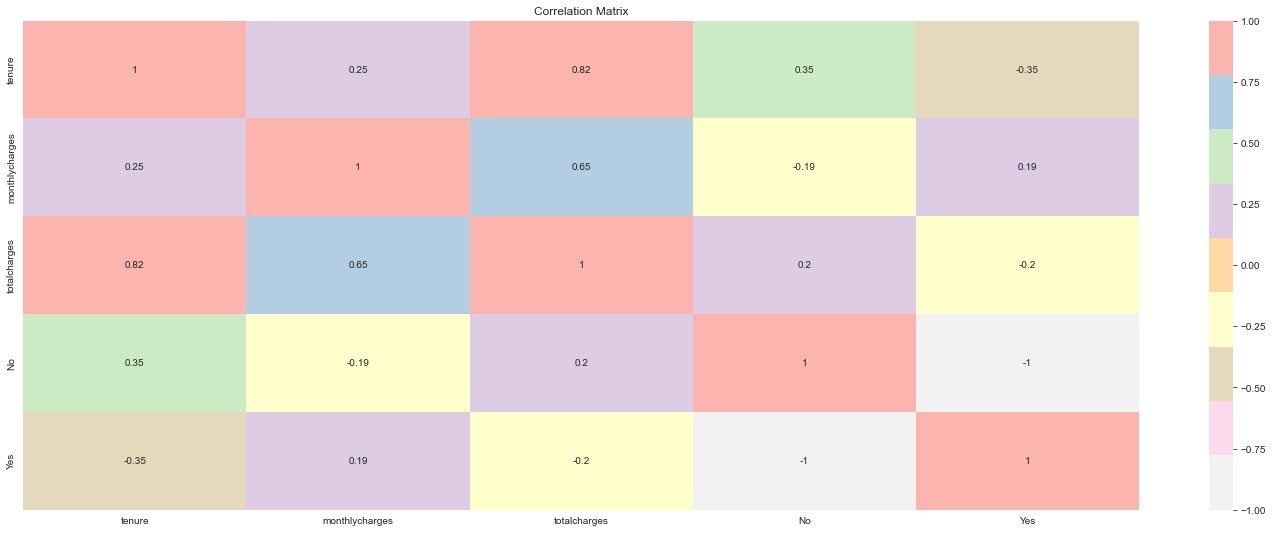

In [69]:
plt.figure(figsize=(25, 9))
sns.heatmap(pd.concat([df, pd.get_dummies(df.churn)], axis=1).corr(), annot=True, cmap='Pastel1_r')
plt.title('Correlation Matrix')

* <strong>Percentage of Client Churn or Not?<strong>

In [70]:
# kolom diagnosis

No = df[(df['churn'] != 0)] # Not churn 
Yes = df[(df['churn'] == 0)] # YES churn 

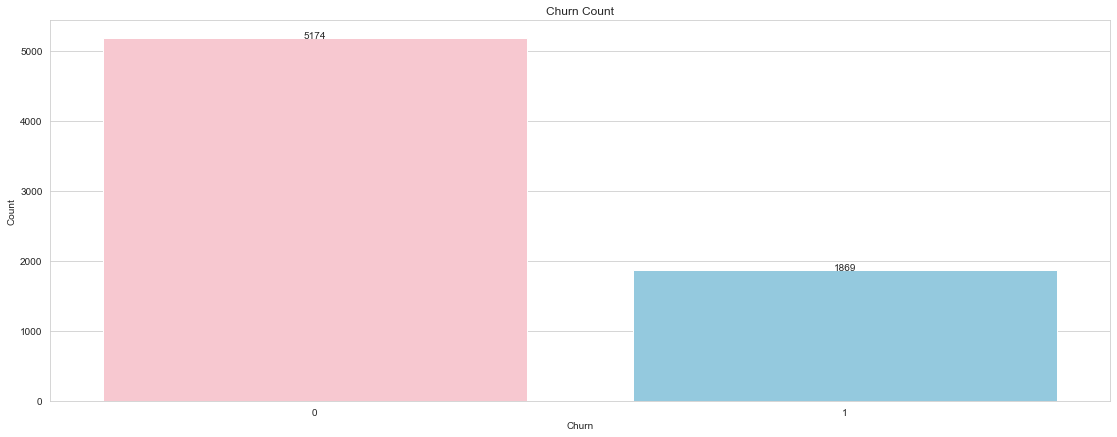

In [155]:
#membuat visualisasi Pie Chart

trace = go.Pie(labels = ['No','Churn'],
               values = df['churn'].value_counts(),
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=[ 'pink', 'skyblue'], line=dict(color='#000000', width=1.5)))


layout = dict(title = 'Percentage of Client Churn or Not?')
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig) 


plt.figure(figsize=(19, 7))

fig = sns.countplot(x='churn', data=df, palette=['pink', 'skyblue'])
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2., height + 0.005, '{:1.0f}'.format(height), ha="center")

plt.title('Churn Count')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

Bisa dilihat chart diatas, persentase 'customer churn' sekitar **26,5% / 1869** dan customer yang tidak atau bertahan masih lumayan banyak **73,5% atau 5174**.

<h3> --> Percentage of client churn or not?

From the chart above, the percentage of customer churn around 26% and customer stay around 73%</h3>

* <strong>Percentage 'Churn or Not' by Gender'<strong>

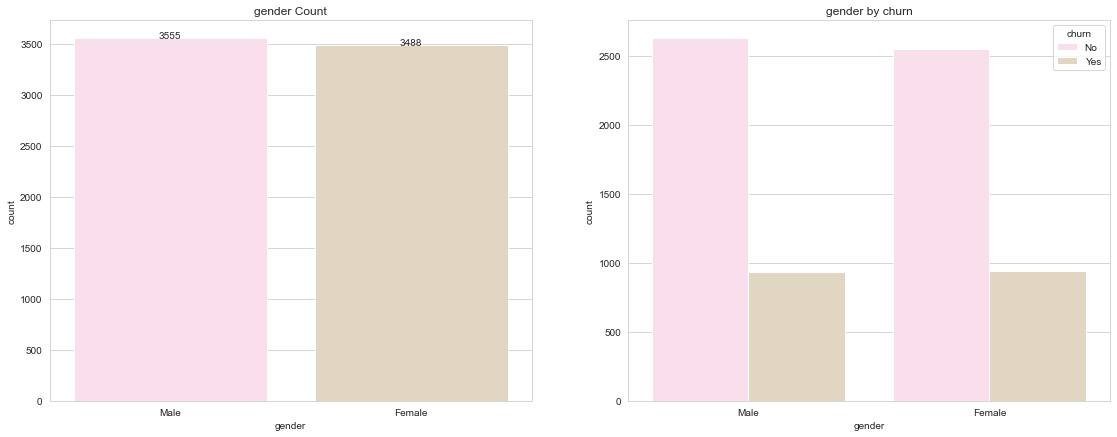

In [72]:
plt.figure(figsize=(19, 7))

plt.subplot(1, 2, 1)
fig = sns.countplot(x='gender', data=df, order=df.gender.value_counts().index, palette=colors2)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2.,
             height + 3,
             '{:1.0f}'.format(height),
             ha="center")

plt.title('gender Count')
plt.xlabel('gender')

plt.subplot(1, 2, 2)
sns.countplot(x='gender', data=df, order=df.gender.value_counts().index, palette=colors2, hue='churn')
plt.title('gender by churn')
plt.xlabel('gender')

plt.show()

Jika dilihat dari chart diatas, customer **MALE** dan **FEMALE** tidak terlalu jauh perbedaan nya dan tidak mempengaruhi target 'churn' karena antara male dan female juga tidak terlalu significant perbedaan nya.

<h3> --> Based on customer gender

They have 2 customer gender MALE and FEMALE, but I think gender not too effect with customer churn.
Because the both differences isn’t too significant</h3>


* <strong>Percentage 'Churn or Not' by Senior Citizen<strong>

Mengubah kolom numerical 'seniorcitizen' dengan nilai **0 = No** dan **1 = Yes** untuk memudahkan membuat chart.

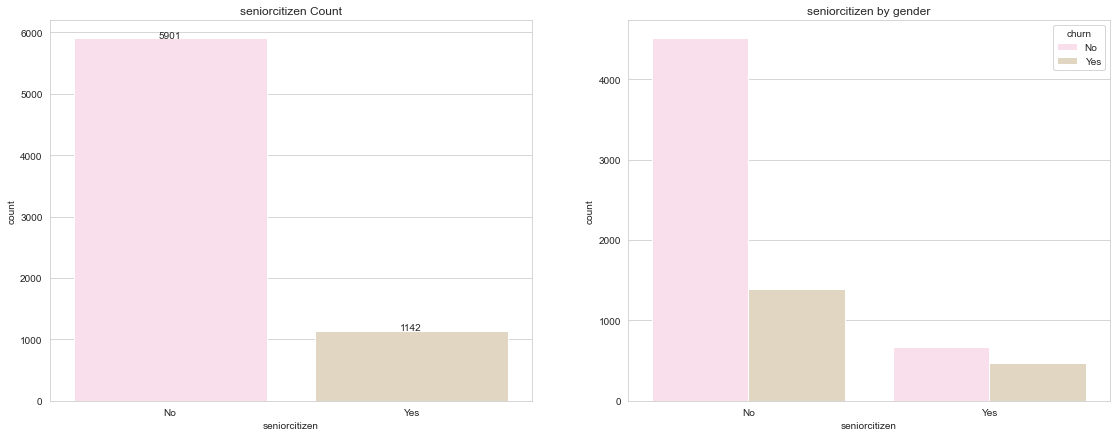

In [73]:
plt.figure(figsize=(19, 7))
plt.subplot(1, 2, 1)
fig = sns.countplot(x='seniorcitizen', data=df, order=df.seniorcitizen.value_counts().index, palette=colors2)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2.,
             height + 3,
             '{:1.0f}'.format(height),
             ha="center")

plt.title('seniorcitizen Count')
plt.xlabel('seniorcitizen')

plt.subplot(1, 2, 2)
sns.countplot(x='seniorcitizen', data=df, order=df.seniorcitizen.value_counts().index, palette=colors2, hue='churn')
plt.title('seniorcitizen by gender')
plt.xlabel('seniorcitizen')

plt.show()

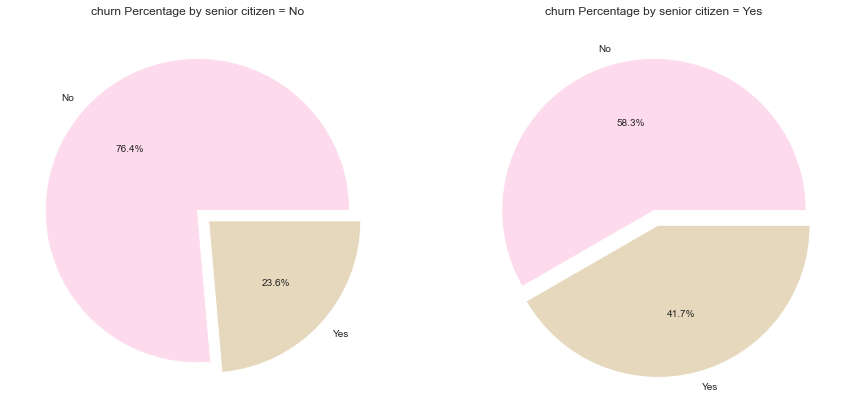

In [74]:
plt.figure(figsize=(15, 9))
plt.subplot(1, 2, 1)
plt.pie(df[df.seniorcitizen == 'No'].churn.value_counts(), labels=df[df.seniorcitizen == 'No'].churn.value_counts().index, colors=colors2, autopct='%1.1f%%', explode=[0, 0.1])
plt.title('churn Percentage by senior citizen = No')
plt.subplot(1, 2, 2)
plt.pie(df[df.seniorcitizen == 'Yes'].churn.value_counts(), labels=df[df.seniorcitizen == 'Yes'].churn.value_counts().index, colors=colors2, autopct='%1.1f%%', explode=[0, 0.1])
plt.title('churn Percentage by senior citizen = Yes')
plt.show()

Senior citizen adalah customer yang berusia lanjut. jika kita lihat ada 1142 customer yang masuk category 'senior citizen'. 
dan lebih banyak customer lanjut usia 'senior citizen' yang memilih 'churn'

<h3> --> Based on senior citizen

They have senior citizen category and as we can see that elderly customer are around 42% choose churn </h3>

* <strong>Percentage 'Churn or Not' by partner<strong>

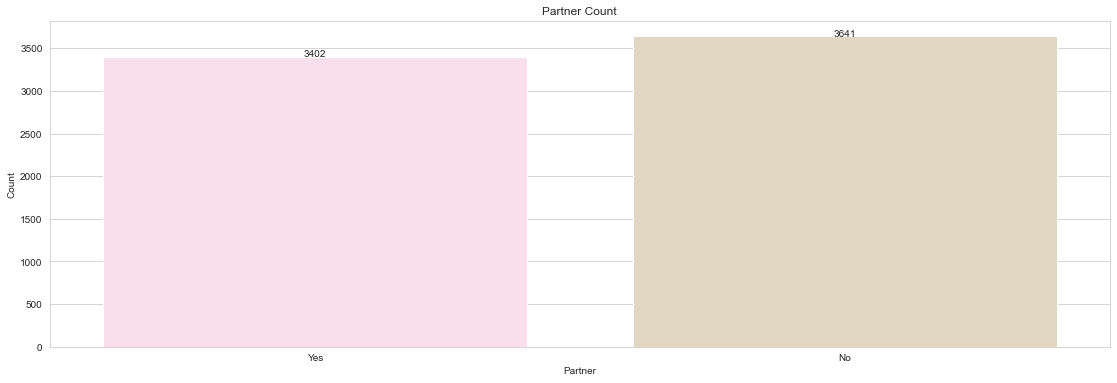

In [154]:
plt.figure(figsize=(19, 6))

fig = sns.countplot(x='partner', data=df, palette=colors2)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2., height + 0.005, '{:1.0f}'.format(height), ha="center")
plt.title('Partner Count')
plt.xlabel('Partner')
plt.ylabel('Count')

plt.show()

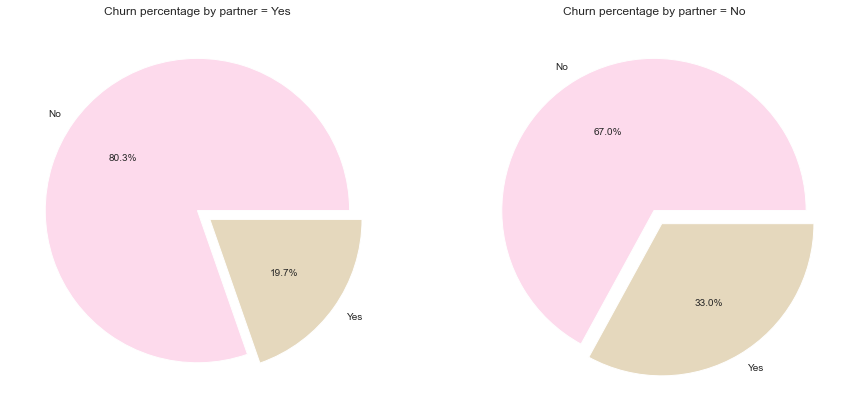

In [76]:
plt.figure(figsize=(15, 9))


plt.subplot(1, 2, 1)
plt.pie(df[df.partner == 'Yes'].churn.value_counts(), labels=df[df.partner == 'Yes'].churn.value_counts().index, colors=colors2, autopct='%1.1f%%', explode=[0, 0.1])
plt.title('Churn percentage by partner = Yes')
plt.subplot(1, 2, 2)
plt.pie(df[df.partner == 'No'].churn.value_counts(), labels=df[df.partner == 'No'].churn.value_counts().index, colors=colors2, autopct='%1.1f%%', explode=[0, 0.1])
plt.title('Churn percentage by partner = No')

plt.show()

Customer yang memiliki pasangan sebanyak **3402** sedangkan **3641** customer tidak memiliki pasangan. namun customer yang tidak memiliki pasangan lebih banyak 'churn' dibandingkan dengan yang sudah memiliki pasangan.

<h3> --> Based on partner

On the dataset we can see about customer partner, but partner status isn’t explained on the dataset. So then my personal judgment, partner is mean  a married customer. Customers who don’t have a partner are more likely to churn than those who are single. Arround 33% single customer potential to customer churn. </h3>

* <strong>Percentage 'Churn or Not' by dependents<strong>

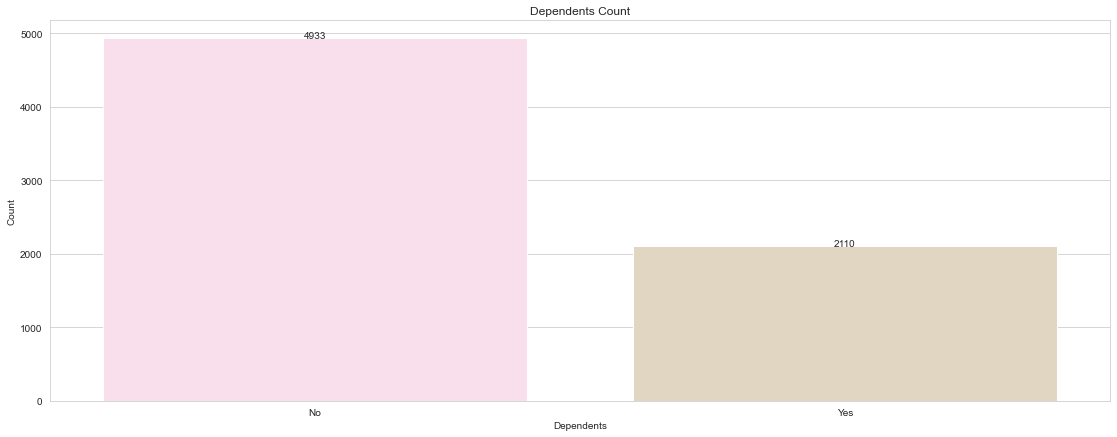

In [153]:
plt.figure(figsize=(19, 7))

fig = sns.countplot(x='dependents', data=df, palette=colors2)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2., height + 0.005, '{:1.0f}'.format(height), ha="center")
plt.title('Dependents Count')
plt.xlabel('Dependents')
plt.ylabel('Count')

plt.show()

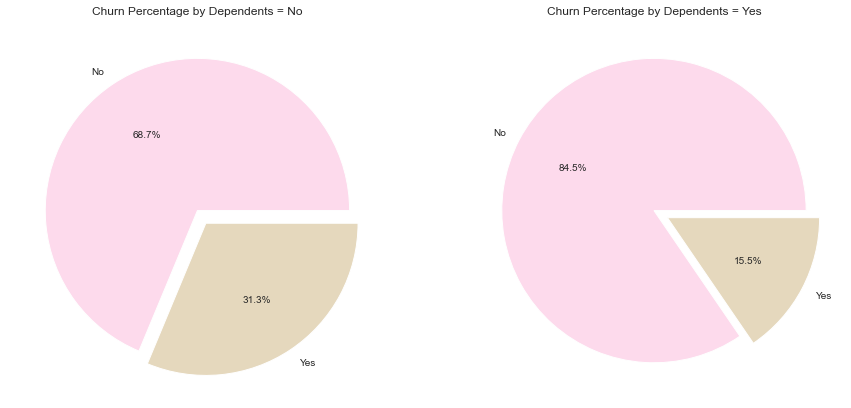

In [78]:
plt.figure(figsize=(15, 9))

plt.subplot(1, 2, 1)
plt.pie(df[df.dependents == 'No'].churn.value_counts(), labels=df[df.dependents == 'No'].churn.value_counts().index, colors=colors2, autopct='%1.1f%%', explode=[0, 0.1])
plt.title('Churn Percentage by Dependents = No')
plt.subplot(1, 2, 2)
plt.pie(df[df.dependents == 'Yes'].churn.value_counts(), labels=df[df.dependents == 'Yes'].churn.value_counts().index, colors=colors2, autopct='%1.1f%%', explode=[0, 0.1])
plt.title('Churn Percentage by Dependents = Yes')
plt.show()

Sebanyak **2110** customer yang memiliki tanggungan dan **4933** customer memiliki tanggungan. Customer yang memiliki tanggungan lebih besar persentase nya untuk 'churn' dibanding yang tidak memiliki tanggungan

<h3> -->  Based on dependents
Customer who have a partner may have some dependents, and customers with dependents are higher percentage of churn than those without dependents.


<h3> <ins> Based on Company Services <ins> </h3>

* <strong>Percentage 'Churn or Not' Phone Services<strong>

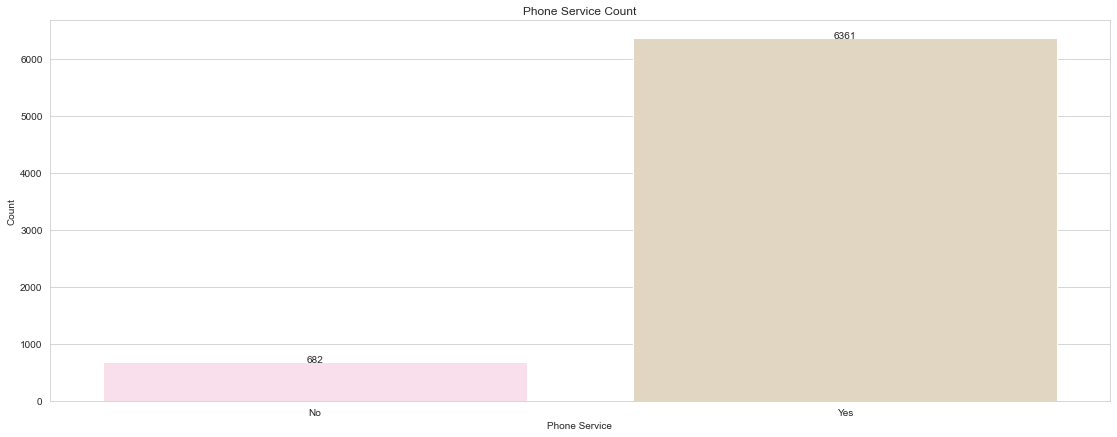

In [152]:
plt.figure(figsize=(19, 7))

fig = sns.countplot(x='phoneservice', data=df, palette=colors2)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2., height + 0.005, '{:1.0f}'.format(height), ha="center")
plt.title('Phone Service Count')
plt.xlabel('Phone Service')
plt.ylabel('Count')

plt.show()

Hampir semua customer memiliki layanan telfon, sebanyak **6361** hanya **682** customer yang tidak memiliki layanan telfon

<h3>Almost all customers subscribed to telephone service, just six hundred eighty two person who doesn’t.</h3>

* <strong>Percentage 'Churn or Not' Multiple Lines<strong>

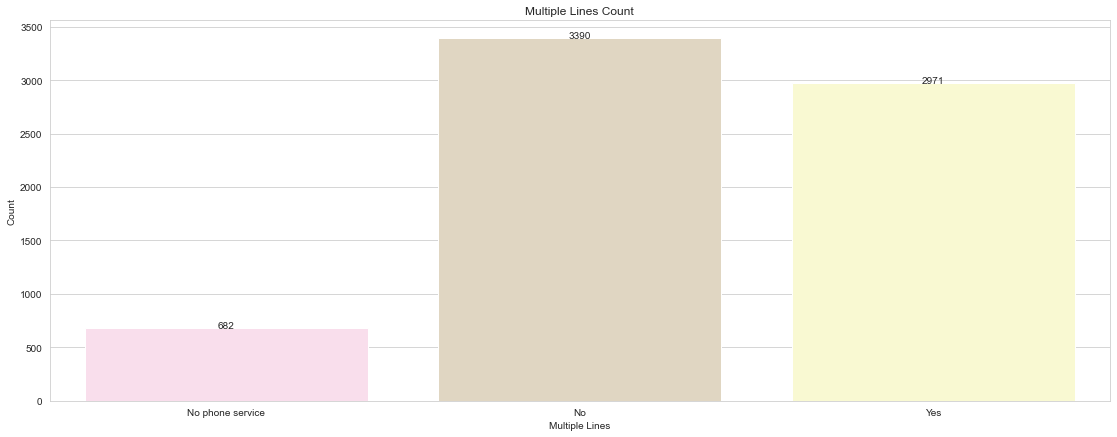

In [151]:
plt.figure(figsize=(19, 7))

fig = sns.countplot(x='multiplelines', data=df, palette=colors2)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2., height + 0.005, '{:1.0f}'.format(height), ha="center")
plt.title('Multiple Lines Count')
plt.xlabel('Multiple Lines')
plt.ylabel('Count')

plt.show()

Customer yang berlangganan layanan 'Multiple lines' sebanyak **2971** sedangkan sisanya tidak 

In [81]:
df[df.phoneservice == 'No'][['phoneservice', 'multiplelines']].head()

,phoneservice,multiplelines
0,No,No phone service
3,No,No phone service
7,No,No phone service
20,No,No phone service
27,No,No phone service


<h3> Multiple lines is a complete package to subscribe to all services. Almost three thousand customers have subscribe multiple lines. Customers who do not subscribe to telephone service then on multiple lines data, the customer enters the 'No Phone Service' category.

However, we see that customers who subscribe and do not subscribe to telephone services have the same potential for customer churn.
</h3>

* <strong>Percentage 'Churn or Not' by Internet Services<strong>

In [82]:
df['internetservice'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: internetservice, dtype: int64

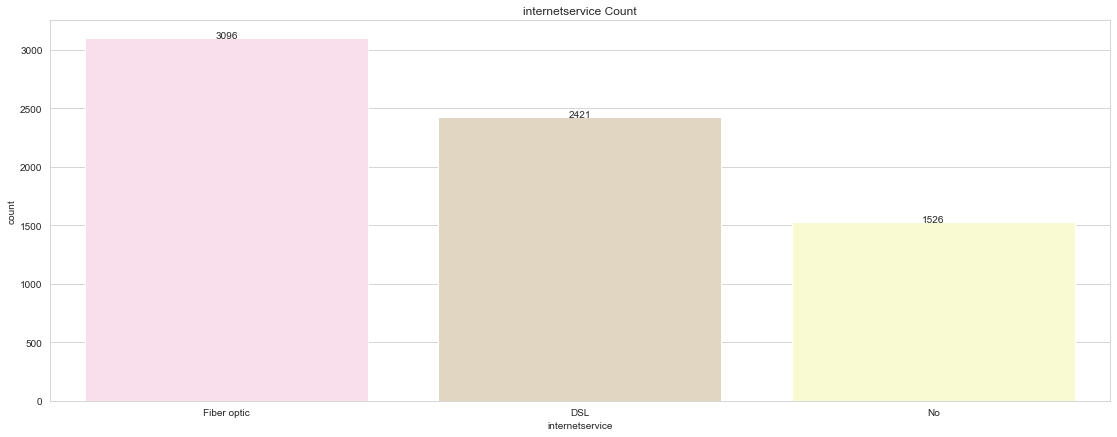

In [150]:
plt.figure(figsize=(19, 7))

fig = sns.countplot(x='internetservice', data=df, order=df.internetservice.value_counts().index, palette=colors2)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2.,
             height + 3,
             '{:1.0f}'.format(height),
             ha="center")

plt.title('internetservice Count')
plt.xlabel('internetservice')

plt.show()

- Customer paling banyak menggunakan Fiber Optic untuk layanan internet, sebanyak **3906** customer yang menggunakan fiber optic.
- Customer yang menggunakan layanan DSL juga lumayan banyak **2421** 
- Customer yang tidak berlangganan layanan internet sebnayak **1526**


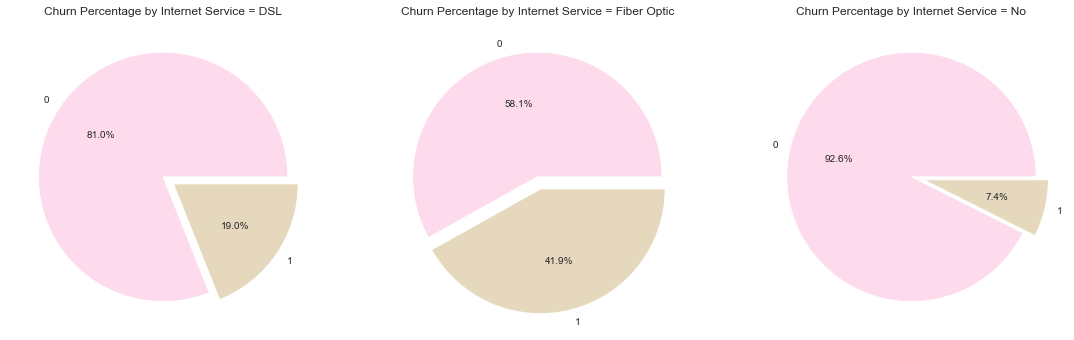

In [149]:
plt.figure(figsize=(19, 9))

plt.subplot(1, 3, 1)
plt.pie(df[df.internetservice == 'DSL'].churn.value_counts(), labels=df[df.internetservice == 'DSL'].churn.value_counts().index, colors=colors2, autopct='%1.1f%%', explode=[0, 0.1])
plt.title('Churn Percentage by Internet Service = DSL')
plt.subplot(1, 3, 2)
plt.pie(df[df.internetservice == 'Fiber optic'].churn.value_counts(), labels=df[df.internetservice == 'Fiber optic'].churn.value_counts().index, colors=colors2, autopct='%1.1f%%', explode=[0, 0.1])
plt.title('Churn Percentage by Internet Service = Fiber Optic')
plt.subplot(1, 3, 3)
plt.pie(df[df.internetservice == 'No'].churn.value_counts(), labels=df[df.internetservice == 'No'].churn.value_counts().index, colors=colors2, autopct='%1.1f%%', explode=[0, 0.1])
plt.title('Churn Percentage by Internet Service = No')
plt.show()

Perusahaan ini memiliki layanan internet berlangganan, ada DSL - FIBER OPTIC, jika kita lihat persentase diatas customer yang berlangganan internet FIBER OPTIC lebih besar persentase 'churn' nya jika dibandingkan dengan customer yang tidak berlangganan internet. 
Hal ini bisa jadi disebabkan jaringan koneksi internet yang lambat membuat pelanggan ingin berhenti dan pindah berlangganan menggunakan perusahaan lain.

<h3> There are two types of internet service options, Fiber Optic and DSL. Most of customers choosing fiber optic than DSL services. But, there are some customers who doesn’ to subscribe internet services.

Customers who subscribe to internet services with fiber optic, turns out that the percentage of customer churn are bigger than DSL customers and those who do not subscribe to internet services.</h3>



<h3>Next to other service, Streaming TV and Streaming Movies..</h3>

<h3>PT. Telcos also provide entertainment services, yes cable tv. There are2 types of options,  streaming tv and streaming movies.</h3> 

* <strong>Percentage 'Churn or Not' by Streaming TV<strong>

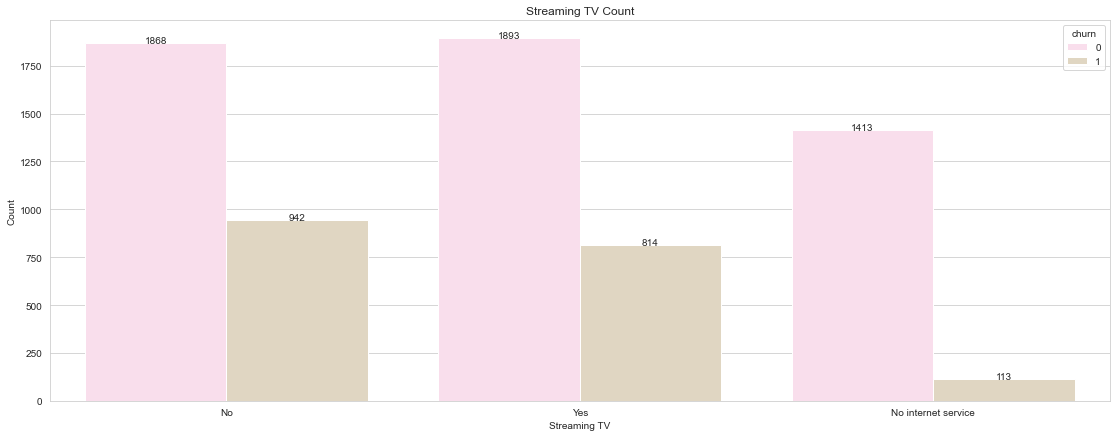

In [144]:
plt.figure(figsize=(19, 7))

fig = sns.countplot(x='streamingtv', data=df, hue='churn', palette=colors2)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2., height + 0.005, '{:1.0f}'.format(height), ha="center")
plt.title('Streaming TV Count')
plt.xlabel('Streaming TV')
plt.ylabel('Count')

plt.show()



Dari customer yang berlangganan Streaming tv tidak terlalu significant persentase 'churn' atau 'no'

* <strong>Percentage 'Churn or Not' by Streaming Movie<strong>

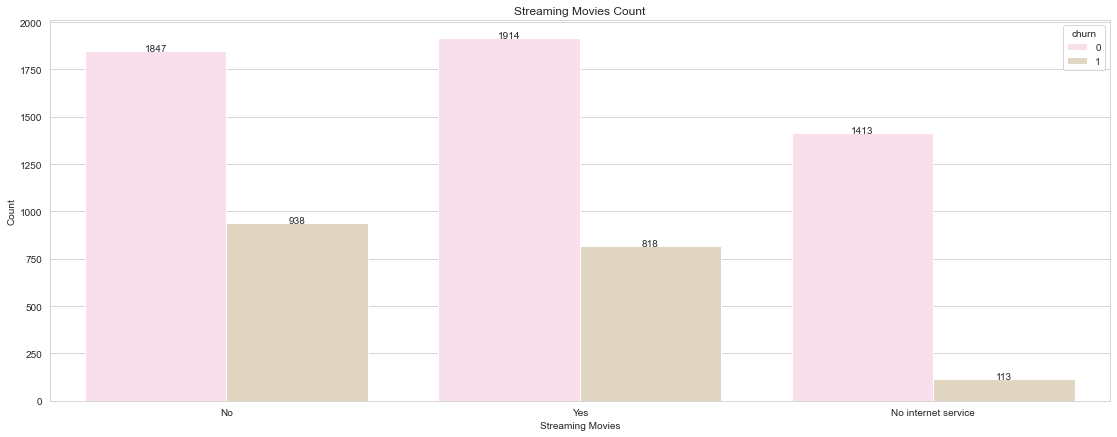

In [143]:
plt.figure(figsize=(19, 7))

fig = sns.countplot(x='streamingmovies', data=df, hue='churn', palette=colors2)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2., height + 0.005, '{:1.0f}'.format(height), ha="center")
plt.title('Streaming Movies Count')
plt.xlabel('Streaming Movies')
plt.ylabel('Count')

plt.show()

Dari customer yang berlangganan Streaming Movies juga tidak terlalu significant persentase 'churn' atau 'no', sama seperti customer yang berlangganan Streaming tv.

<h3>But, customers who subscribed and not subscribed, it doesn't really affect the potential for customer churn</h3>

<h4>Next they have 4 categories that we will look at,</h4>


* <strong>Online Security - Online Backup - Device Protection - Tech Support<strong>

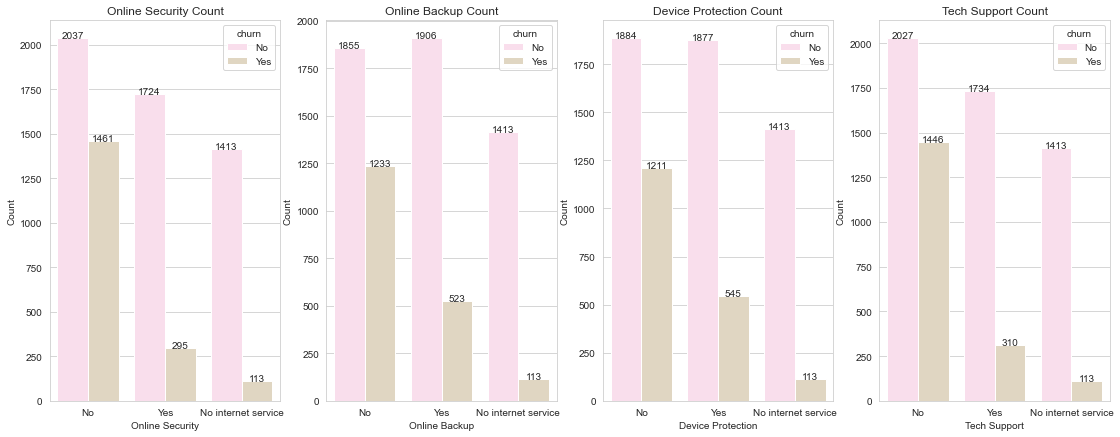

In [87]:
plt.figure(figsize=(19, 7))

plt.subplot(1, 4, 1)
fig = sns.countplot(x='onlinesecurity', data=df, palette=colors2, hue='churn')
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2., height + 0.005, '{:1.0f}'.format(height), ha="center")
plt.title('Online Security Count')
plt.xlabel('Online Security')
plt.ylabel('Count')

plt.subplot(1, 4, 2)
fig = sns.countplot(x='onlinebackup', data=df, hue='churn', palette=colors2, order=df.onlinebackup.value_counts().index)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2., height + 0.005, '{:1.0f}'.format(height), ha="center")
plt.title('Online Backup Count')
plt.xlabel('Online Backup')
plt.ylabel('Count')

plt.subplot(1, 4, 3)
fig = sns.countplot(x='deviceprotection', data=df, palette=colors2, hue='churn')
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2., height + 0.005, '{:1.0f}'.format(height), ha="center")
plt.title('Device Protection Count')
plt.xlabel('Device Protection')
plt.ylabel('Count')

plt.subplot(1, 4, 4)
fig = sns.countplot(x='techsupport', data=df, palette=colors2, hue='churn')
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2., height + 0.005, '{:1.0f}'.format(height),  ha="center")
plt.title('Tech Support Count')
plt.xlabel('Tech Support')
plt.ylabel('Count')

plt.show()

Jika kita lihat persentase diatas dapat diketahui bahwa customer yang tidak berlangganan 'online security', 'online backup', 'device protection', dan 'tech support' lebih berpotensi 'churn' jika di bandingkan customer yang ikut berlangganan

<h3>As we can see the percentage about it, customers who doesn’t subscribe ‘online security’ - ‘online backup’ - 
‘Device protection’ - and ‘tech support’ have a higher percentage to customer churn.</h3>

* <strong>Customer Contract<strong>

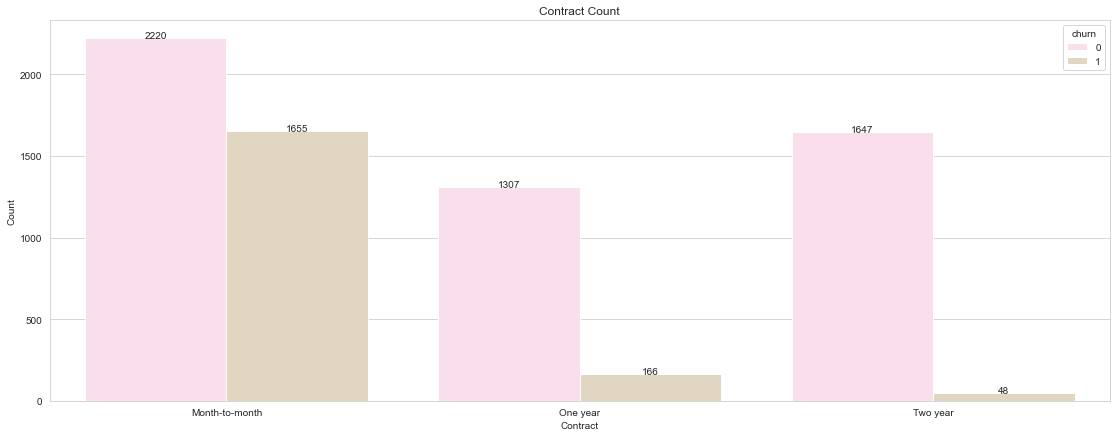

In [142]:
plt.figure(figsize=(19, 7))

fig = sns.countplot(x='contract', data=df, hue='churn', palette=colors2)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2., height + 0.005, '{:1.0f}'.format(height), ha="center")

plt.title('Contract Count')
plt.xlabel('Contract')
plt.ylabel('Count')

plt.show()

Kebanyakan dari customer yang berpotensi 'customer churn' adalah customer yang melakukan pembayaran per bulan, sedangkan customer yang membayar biaya layanan per-tahun itu sangat kecil untuk 'churn'

<h4> --> Most of customers who have the potential for 'customer churn' who make monthly payments, 

while customers who pay service charge by year are the least for 'churn'. </h4>

* <strong>Paperless Billing<strong>

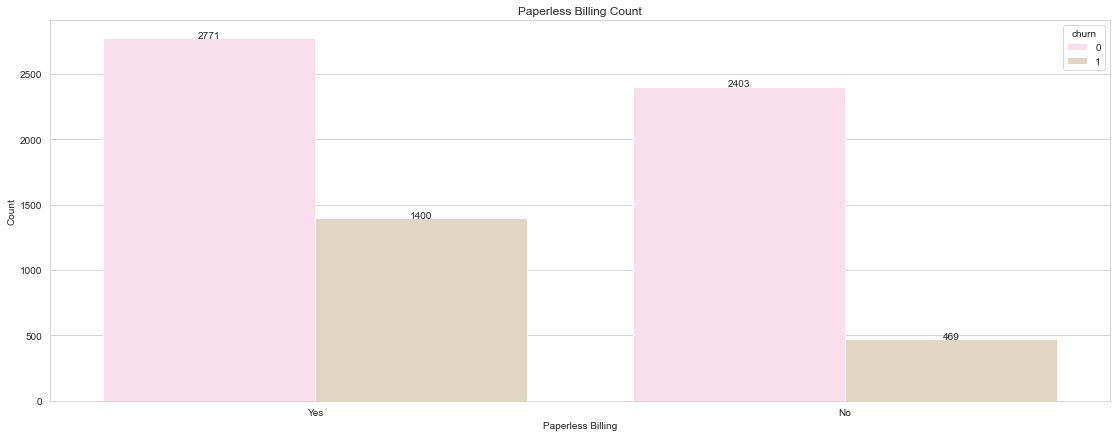

In [141]:
plt.figure(figsize=(19, 7))

fig = sns.countplot(x='paperlessbilling', data=df, hue='churn', palette=colors2)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2., height + 0.005, '{:1.0f}'.format(height), ha="center")
plt.title('Paperless Billing Count')
plt.xlabel('Paperless Billing')
plt.ylabel('Count')

plt.show()

Jika dilihat dari 'payment method' customer yang menggunakan paperless billing hampir setengahnya berpotensi 'customer churn'

<h4> --> As we can see from 'paperless billing', customers who choose paperless billing, 

almost half of them have the potential for 'customer churn'. </h4>

* <strong>Payment Method<strong>

<h4> There are 4 types of billing payment method options: </h4>

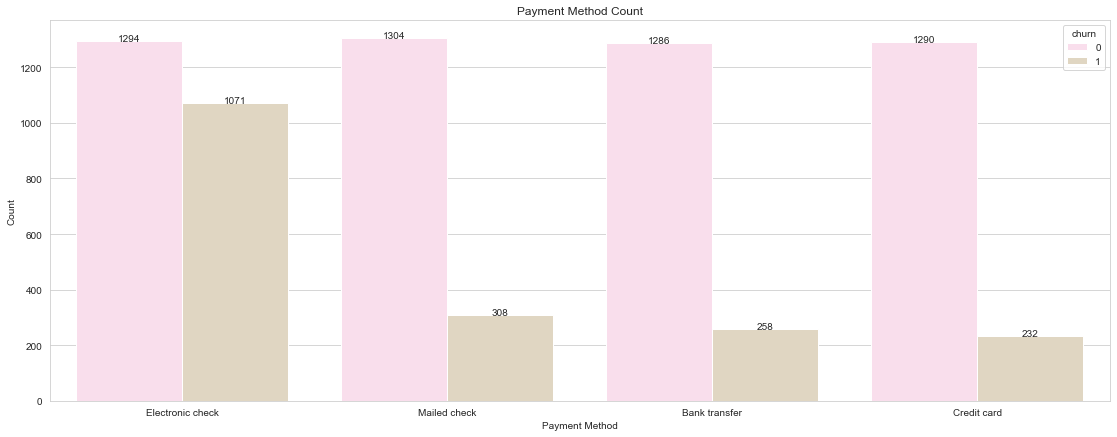

In [156]:
plt.figure(figsize=(19, 7))

fig = sns.countplot(x='paymentmethod', data=df, hue='churn', palette=colors2)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2., height + 0.005, '{:1.0f}'.format(height), ha="center")
plt.title('Payment Method Count')
plt.xlabel('Payment Method')
fig.set_xticklabels(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'])
plt.ylabel('Count')

plt.show()

Metode pembayaran dengan potensi 'customer churn' paling tinggi adalah customer yang menggunakan metode pembayaran 'Electronic check' sedangkan untuk metode pembayaran lain tidak ada perbedaan yang significant.

<h4> --> The highest potential for 'customer churn' from payment method is customer who choose the 'Electronic check', while for other payment methods there's no significant difference. </h4>

Text(0.5, 1.0, 'Correlation Matrix')

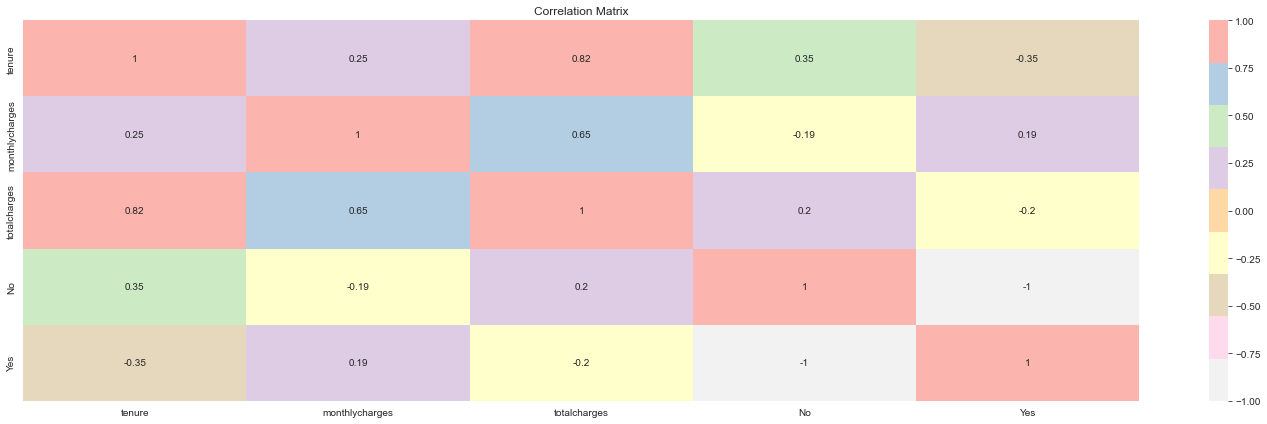

In [88]:
plt.figure(figsize=(25, 7))
sns.heatmap(pd.concat([df, pd.get_dummies(df.churn)], axis=1).corr(), annot=True, cmap='Pastel1_r')
plt.title('Correlation Matrix')

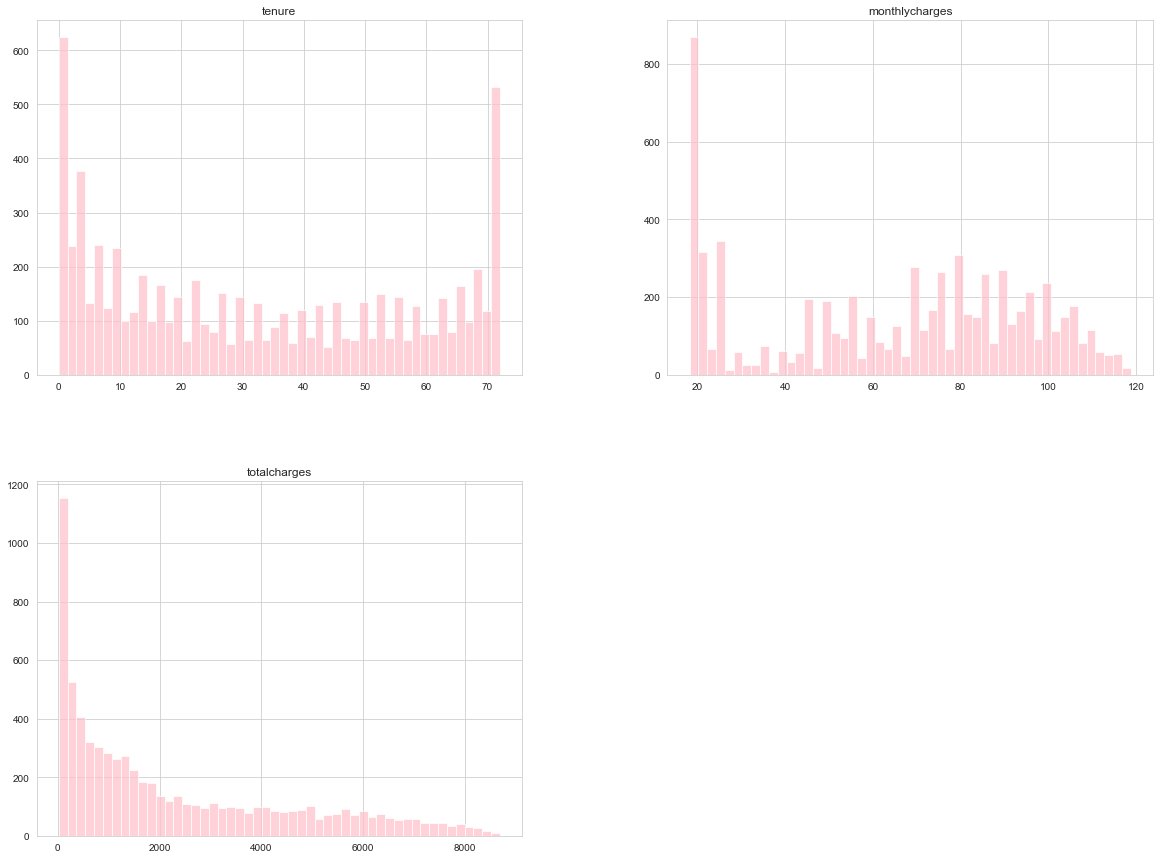

In [89]:
#histogram of all the features 

df.hist(bins=50, figsize=(20,15),color='pink',alpha=0.7)
plt.show()

Kolom 'monthly charge' dan 'total charge' diatas terlihat distribusi nya **skewed** 

### <strong>Data Preprocessing<strong>

##### Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.
---

Merubah kolom categorical pada **'churn'** dengan nilai pada label 0 dan 1 untuk memudahkan dalam proses evaluasi model.

--> Changed the categorical column in **'churn'** with values on labels 0 and 1 to facilitate the model evaluation process.

In [90]:
df['churn'] = np.where(df['churn']=='Yes', 1, 0)

##### Spliting Data

<h4>In this section I will do data splitting, I split to 3 categories. 
Data training-set, validation set and test-set;

- **70%** data **training-set**
- **20%** data **validation-set**
- **10%** data **testing-set**</h4>

Pada bagian ini akan dilakukan **Spliting Data** yang akan menjadi (training-set, validation-set, dan testing-set) 
dengan perbandingan [7 - 2 - 1] :

- **70%** data **training-set**
- **20%** data **validation-set**
- **10%** data **testing-set**

In [91]:
df_train_val, df_test = train_test_split(df, test_size=0.1, random_state=25, stratify=df.churn)
df_train, df_val = train_test_split(df_train_val, test_size=0.2, random_state=25, stratify=df_train_val.churn)

In [92]:
df_train = df_train.dropna()
df_val = df_val.dropna()

In [93]:
# Data Training 
X_train = df_train.drop(['churn'], axis=1) 
y_train = df_train['churn']

# Data Validation
X_val = df_val.drop(['churn'], axis=1) 
y_val = df_val['churn'] 

In [94]:
X_train.reset_index(drop=True, inplace=True)
X_val.reset_index(drop=True, inplace=True)

##### Checking Outliers

In [95]:
preprocess_table = pd.DataFrame({'columns' : X_train.describe().columns, 'skew' : X_train.skew(axis=0)})
preprocess_table.reset_index(drop=True, inplace=True)

preprocess_table['status'] = np.where(preprocess_table['skew'].abs()>0.5, 'Skewed', 'Normal')

In [96]:
preprocess_table

,columns,skew,status
0,tenure,0.229541,Normal
1,monthlycharges,-0.228665,Normal
2,totalcharges,0.955787,Skewed


'total charges' column is skewed

In [97]:
def find_normal_boundaries(db, variable):
    upper_boundary = db[variable].mean() + 3 * db[variable].std()
    lower_boundary = db[variable].mean() - 3 * db[variable].std()

    return upper_boundary, lower_boundary

def find_skewed_boundaries(db, variable, distance):
    IQR = db[variable].quantile(0.75) - db[variable].quantile(0.25)

    lower = db[variable].quantile(0.25) - distance * IQR
    upper = db[variable].quantile(0.75) + distance * IQR

    return upper, lower

In [98]:
# Function to create histogram and boxplot for each features

def diagnostic_plots(df, df_trim, variable):
    #Define figure size
    plt.figure(figsize=(16,4))

    #Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df_trim[variable], bins=30, kde=True, color='#006699')
    plt.title(f'Histogram of {variable}')

    #Boxplot Before
    plt.subplot(1,3, 2)
    sns.boxplot(y=df[variable])
    plt.title(f'Before Handling in {variable}')

    #Boxplot After
    plt.subplot(1,3, 3)
    sns.boxplot(y=df_trim[variable])
    plt.title(f'After Handling in {variable}')

    plt.show()

In [99]:
j = 0
outlier_limit={}
for i in X_train.describe().columns:
    if preprocess_table['skew'].loc[(preprocess_table['columns']==i)].values[0]== 'Normal':
        upper_boundary, lower_boundary = find_normal_boundaries(X_train, i)
        print(f"Batas lower dan upper untuk {i}:{lower_boundary, upper_boundary}")
        outlier_limit[f"outliers{j}"] = np.where(X_train[i] > upper_boundary, True, np.where(X_train[i] < lower_boundary, True, False))
    else:
        upper_boundary, lower_boundary = find_skewed_boundaries(X_train, i, 1.5)
        print(f"Batas lower dan upper untuk {i}:{lower_boundary, upper_boundary}")
        outlier_limit[f"outliers{j}"] = np.where(X_train[i] > upper_boundary, True, np.where(X_train[i] < lower_boundary, True, False))
    print("="*30)
    j+=1

Batas lower dan upper untuk tenure:(-61.125, 125.875)
Batas lower dan upper untuk monthlycharges:(-46.16874999999999, 171.78125)
Batas lower dan upper untuk totalcharges:(-4692.0375, 8911.1625)


In [100]:
for i, (k, v) in enumerate(outlier_limit.items()):
    X_train_trimmed_sim = X_train.loc[~outlier_limit[k]]
    preprocess_table.loc[i,'trimmed_row'] = X_train.shape[0] - X_train_trimmed_sim.shape[0]
    preprocess_table.loc[i,'percentage'] = np.round(100-(X_train_trimmed_sim.shape[0]/X_train.shape[0]*100), 2)
    preprocess_table.loc[i,'action'] = np.where(preprocess_table.loc[i,'percentage']>15, 'Keep', 
                                        np.where(preprocess_table.loc[i,'percentage']>5, 'Capping', np.where(preprocess_table.loc[i,'percentage']>0, 'Trim', 'None')))

<h4> 3 ways to handle outliers;

- If Outliers less than <5% will be handling by trimming method
- If Outliers 5%-15% will be handling by capping method
- Outliers will be kept if less than >15% </h4>

In [101]:
preprocess_table

,columns,skew,status,trimmed_row,percentage,action
0,tenure,0.229541,Normal,0.0,0.0,None
1,monthlycharges,-0.228665,Normal,0.0,0.0,None
2,totalcharges,0.955787,Skewed,0.0,0.0,None


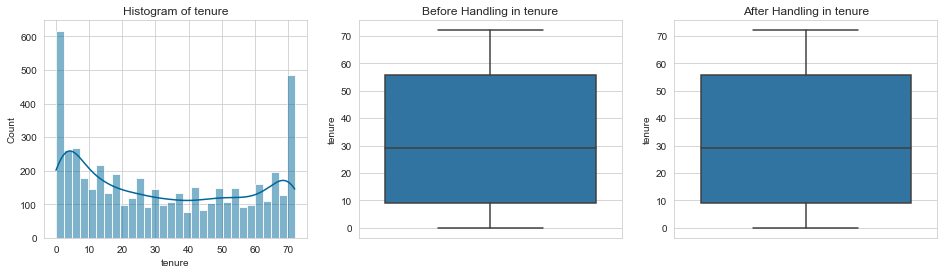

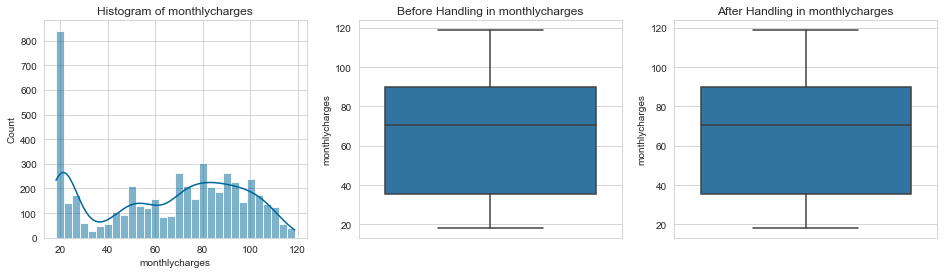

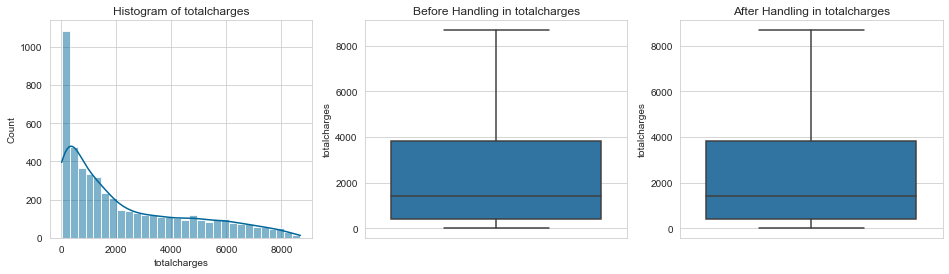

In [102]:
for i in X_train.describe().columns:
    diagnostic_plots(X_train, X_train, i)

<h4> In the 'total_charges' column, the skewness value is 0.9, so the outliers will be kept and will not handle outliers. then I will skip this section.</h4>

Untuk menghandle outliers akan dilakukan dengan cara:

- Outliers <5% akan dilakukan dengan metode trimming
- Outliers 5%-15% akan dilakukan dengan metode capping
- Outliers akan di 'keep' atau dibiarkan apabila berada >15%

Namun karena tidak ada outliers yang perlu di handling, maka saya akan melewatkan tahap ini.

##### Feature Selection

In [103]:
X_train.select_dtypes(include=np.number).columns.tolist()

['tenure', 'monthlycharges', 'totalcharges']

In [104]:
X_train.select_dtypes(include='object').columns.tolist()

['gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod']

### <strong>Model Definition<strong>

##### Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.
---

##### Build Pipeline

<h3>Input 'feature scaling' and 'feature encoding' into the pipeline:
- **Feature Scaling** using **StandardScaler**
- **Feature Encoding** using **OneHotEncoder**</h3>

Meng-input 'feature scaling' dan 'feature encoding' ke dalam pipeline:
- **Feature Scaling** menggunakan **StandardScaler**
- **Feature Encoding** menggunakan **OneHotEncoder**

In [105]:
num_pipe = Pipeline([
    ('scaling', StandardScaler())
])

cat_pipe =  Pipeline([
    ('encoded', OneHotEncoder())
])

preprocessor = ColumnTransformer([
    ('num', num_pipe, X_train.select_dtypes(include=['float64', 'int64']).columns),
    ('cat', cat_pipe, X_train.select_dtypes(include=['object']).columns)
])

In [106]:
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)

In [107]:
print(f'Jumlah Features: {X_train.shape[1]}')

Jumlah Features: 46


In [108]:
print(f'Jumlah Features: {X_val.shape[1]}')

Jumlah Features: 46


##### Input pipeline

In [109]:
# Training Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(10000).batch(23)

#Validation Dataset
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).shuffle(10000).batch(23)

2022-04-18 22:23:46.945294: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### <strong>Model Training<strong>

##### Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.
---

In [110]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

##### Sequential API

In [111]:
# Model declaration
model = Sequential()

model.add(Dense(15, activation='relu', input_shape=(46,))) # hidden layer 
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), verbose=1)

Epoch 1/100
159/159 [==============================] - 1s 3ms/step - loss: 0.6219 - accuracy: 0.6799 - val_loss: 0.4846 - val_accuracy: 0.7618
Epoch 2/100
159/159 [==============================] - 0s 2ms/step - loss: 0.4386 - accuracy: 0.8004 - val_loss: 0.4393 - val_accuracy: 0.7997
Epoch 3/100
159/159 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.8014 - val_loss: 0.4361 - val_accuracy: 0.7973
Epoch 4/100
159/159 [==============================] - 0s 2ms/step - loss: 0.4184 - accuracy: 0.8063 - val_loss: 0.4335 - val_accuracy: 0.7989
Epoch 5/100
159/159 [==============================] - 0s 2ms/step - loss: 0.4152 - accuracy: 0.8051 - val_loss: 0.4337 - val_accuracy: 0.7981
Epoch 6/100
159/159 [==============================] - 0s 3ms/step - loss: 0.4128 - accuracy: 0.8043 - val_loss: 0.4328 - val_accuracy: 0.8036
Epoch 7/100
159/159 [==============================] - 0s 2ms/step - loss: 0.4128 - accuracy: 0.8047 - val_loss: 0.4323 - val_accuracy: 0.7997

##### Functional API

In [112]:
input_data = Input(shape=(X_train.shape[1],))
hidden_1 = Dense(15, activation='relu')(input_data)
output_data = Dense(1, activation='sigmoid')(hidden_1)

model = Model(inputs=input_data, outputs=output_data)

In [113]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [114]:
# Train the model
history = model.fit(train_dataset, epochs=100, validation_data=val_dataset, verbose=0)

In [115]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 46)]              0         
                                                                 
 dense_4 (Dense)             (None, 15)                705       
                                                                 
 dense_5 (Dense)             (None, 1)                 16        
                                                                 
Total params: 721
Trainable params: 721
Non-trainable params: 0
_________________________________________________________________


### <strong>Model Evaluation<strong>

##### Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.
---

In [116]:
metrics = pd.DataFrame(history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.457464,0.781657,0.434454,0.795741
1,0.421635,0.798422,0.428972,0.798896
2,0.417227,0.803156,0.427573,0.799685
3,0.415303,0.806114,0.427118,0.802050
4,0.413126,0.803353,0.427053,0.799685


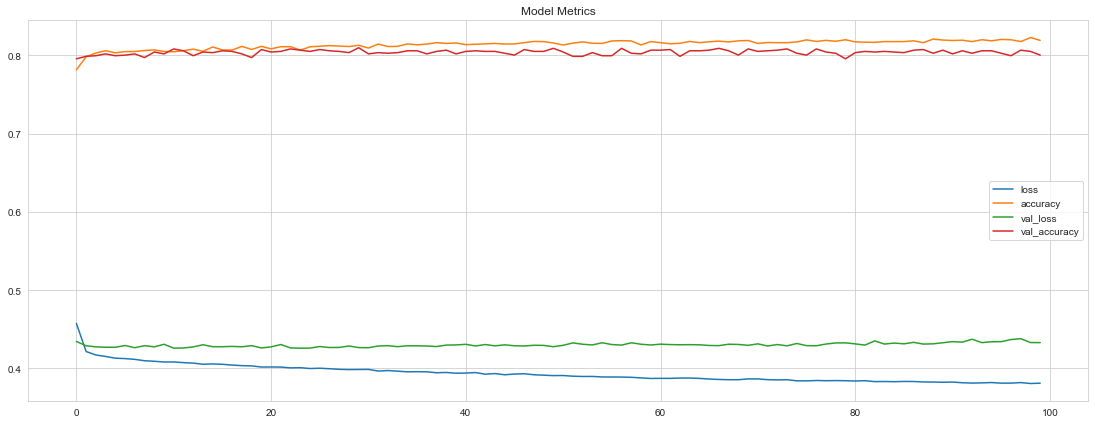

In [117]:
metrics.plot(figsize=(19, 7))

plt.title('Model Metrics')
plt.show()

In [118]:
print('Training Set')
print(classification_report(y_train, model.predict(X_train).round()))
print('Validation Set')
print(classification_report(y_val, model.predict(X_val).round()))

Training Set
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      3725
           1       0.71      0.54      0.61      1345

    accuracy                           0.82      5070
   macro avg       0.78      0.73      0.75      5070
weighted avg       0.81      0.82      0.81      5070

Validation Set
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       931
           1       0.67      0.49      0.57       337

    accuracy                           0.80      1268
   macro avg       0.75      0.70      0.72      1268
weighted avg       0.79      0.80      0.79      1268



##### Model Analysis

Hasil accuracy model cukup baik, training-set sangat kecil **0.80** dan **0.81** validation set. 
Pada grafik dapat dilihat bahwa model mengalami overfit karena **training-loss** mengalami decrease sedangkan **validation-nya** increase

<h4> --> Model Analysis

The results of the accuracy model are quite good, the training-set and validation set are good **0.80** and **0.81** .
on the graphic above, we can see that the model is overfit because **training-loss** has decreased while **validation** increased.</h4>

##### Model Improvement

Karena model pertama ngalami overfit, maka pada bagian ini akan dilakukan tweak terhadap model agar menghasilkan loss dan akurasi yang lebih baik. 

##### Sequential API

In [119]:
# Model declaration
model1 = Sequential()

model1.add(Dropout(0.3, input_shape=(X_train.shape[1],)))
model1.add(Dense(35, activation='elu'))
model1.add(Dense(15, activation='elu'))
model1.add(Dense(10, activation='elu'))
model1.add(Dense(1, activation='sigmoid'))

# Compile 
model1.compile(optimizer='nadam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history1 = model1.fit(train_dataset, epochs=200, validation_data=val_dataset, verbose=1)

Epoch 1/200
221/221 [==============================] - 2s 3ms/step - loss: 0.4587 - accuracy: 0.7787 - val_loss: 0.4320 - val_accuracy: 0.8021
Epoch 2/200
221/221 [==============================] - 0s 2ms/step - loss: 0.4428 - accuracy: 0.7852 - val_loss: 0.4310 - val_accuracy: 0.7855
Epoch 3/200
221/221 [==============================] - 0s 2ms/step - loss: 0.4393 - accuracy: 0.7852 - val_loss: 0.4321 - val_accuracy: 0.7981
Epoch 4/200
221/221 [==============================] - 1s 2ms/step - loss: 0.4392 - accuracy: 0.7895 - val_loss: 0.4296 - val_accuracy: 0.8005
Epoch 5/200
221/221 [==============================] - 0s 2ms/step - loss: 0.4365 - accuracy: 0.7882 - val_loss: 0.4318 - val_accuracy: 0.7957
Epoch 6/200
221/221 [==============================] - 0s 2ms/step - loss: 0.4366 - accuracy: 0.7874 - val_loss: 0.4302 - val_accuracy: 0.7997
Epoch 7/200
221/221 [==============================] - 0s 2ms/step - loss: 0.4399 - accuracy: 0.7850 - val_loss: 0.4326 - val_accuracy: 0.7879

In [120]:
# Model declaration
#model1 = Sequential()

#model1.add(Dense(30, activation='elu', input_shape=(46,))) # hidden layer 
#model1.add(Dense(20, activation='elu'))
#model1.add(Dense(10, activation='elu'))
#model1.add(Dense(1, activation='sigmoid'))

# compile
#model.compile(loss='binary_crossentropy',
              #optimizer="nadam",
              #metrics=['accuracy'])

# Train the model
#history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), verbose=1)

##### Functional API

In [121]:
input_data = Input(shape=(X_train.shape[1],))
hidden_1 = Dense(35, activation='elu')(input_data)
output_data = Dense(1, activation='sigmoid')(hidden_1)

model = Model(inputs=input_data, outputs=output_data)

In [122]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [123]:
# Train the model
history = model.fit(train_dataset, epochs=100, validation_data=val_dataset, verbose=0)

In [124]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 46)]              0         
                                                                 
 dense_10 (Dense)            (None, 35)                1645      
                                                                 
 dense_11 (Dense)            (None, 1)                 36        
                                                                 
Total params: 1,681
Trainable params: 1,681
Non-trainable params: 0
_________________________________________________________________


In [125]:
metrics = pd.DataFrame(history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.446796,0.776331,0.432427,0.796530
1,0.419239,0.800000,0.427308,0.805994
2,0.417730,0.802564,0.425724,0.801262
3,0.415558,0.806509,0.427913,0.802839
4,0.415606,0.804536,0.425608,0.807571


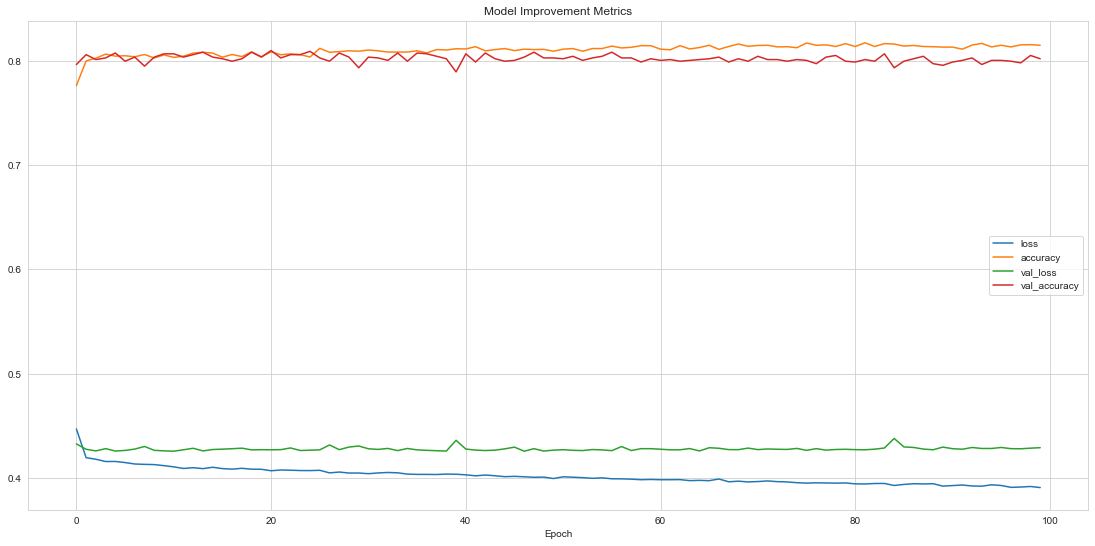

In [126]:
metrics = pd.DataFrame(history.history)
metrics.plot(figsize=(19, 9))
plt.title('Model Improvement Metrics')
plt.xlabel('Epoch')
plt.show()

In [127]:
print('Training Set')
print(classification_report(y_train, model.predict(X_train).round()))
print('Validation Set')
print(classification_report(y_val, model.predict(X_val).round()))

Training Set
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      3725
           1       0.70      0.53      0.60      1345

    accuracy                           0.82      5070
   macro avg       0.77      0.72      0.74      5070
weighted avg       0.81      0.82      0.81      5070

Validation Set
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       931
           1       0.66      0.52      0.58       337

    accuracy                           0.80      1268
   macro avg       0.75      0.71      0.73      1268
weighted avg       0.79      0.80      0.79      1268



##### Model Analysis

Setelah melakukan model improvement dengan menambahkan 1 hidden layer dan 10 neuron, epoch pada training model juga di tambahkan menjadi 200. model menghasilkan loss dan accuracy yang tidak terlalu significant. nilai accuracy pada training-set sebesar **0.82** dan validation-set **0.81**

<h4> --> Model Improvement Analysis

After doing model improvement by adding 1 hidden layer and 10 neurons, the epoch on the training model is also added to 200. The model produces loss and accuracy that are not too significant. the accuracy value in the training-set is **0.82** and the validation-set **0.81** </h4>

### <strong>Model Saving<strong>

##### Dengan melihat hasil evaluasi model, pilihlah model terbaik untuk disimpan. Model terbaik ini akan digunakan kembali dalam melakukan deployment di Heroku.
---


In [128]:
# Save the model
model.save('model.h5')
print('Model Saved!')

# Save preprocessing pipeline
with open('preprocessor.pkl', 'wb') as file:
    pickle.dump(preprocessor, file)

Model Saved!


### <strong>Model Inference<strong>

##### Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.
---

In [129]:
df_test

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
4743,Male,No,Yes,No,56,Yes,Yes,DSL,No,Yes,Yes,No,No,No,Two year,No,Credit card (automatic),59.50,3389.25,0
6242,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,Yes,Two year,No,Credit card (automatic),107.45,7658.30,0
4138,Female,No,No,No,1,Yes,No,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,85.45,85.45,1
3579,Male,No,Yes,Yes,40,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,81.20,3292.30,0
4478,Female,No,No,No,3,Yes,No,DSL,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,54.20,140.40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2343,Female,No,Yes,No,3,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,46.10,130.15,0
6505,Male,No,Yes,Yes,56,Yes,No,DSL,Yes,Yes,Yes,No,No,No,Two year,Yes,Bank transfer (automatic),59.80,3457.45,0
2283,Male,No,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,71.55,71.55,1
4278,Female,No,Yes,No,48,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Electronic check,97.05,4692.95,0


In [130]:
# Split Feature & Target

X_test = df_test.drop(['churn'], axis=1) 
y_test = df_test['churn'] 

In [131]:
X_test = preprocessor.transform(X_test)

In [132]:
y_pred = model.predict(X_test).round()

In [133]:
predictions = pd.DataFrame({'churn': y_test, 'predicted churn': y_pred.flatten().astype(int)})
predictions[predictions.churn == 1].head(25)

,churn,predicted churn
4138,1,1
5099,1,0
1043,1,0
6745,1,0
973,1,0
1354,1,1
2290,1,1
1934,1,1
2662,1,1
4471,1,0


In [134]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).shuffle(10000).batch(23)

In [135]:
results = model.evaluate(test_dataset)
print(f'Data Test Set - Loss     : {results[0]:.2f}')
print(f'Data Test Set - Accuracy : {results[1]:.2f}')

31/31 [==============================] - 0s 2ms/step - loss: 0.4076 - accuracy: 0.8071
Data Test Set - Loss     : 0.41
Data Test Set - Accuracy : 0.81


### <strong>Conclusion<strong>
---

<h4> In this Milestone 2 project, I used data from PT. TELCO
(Full dataset can be downloaded from this website <a href='https://www.kaggle.com/code/ahmedhanymetawaa/churn-eda-predicting-model'>Kaggle</a>)

PT. TELCO is a company engaged in tech, which provides various types of services such as telephone access, internet and cable tv. 

In this project I want to predict which customers will decide to <ins>**customer churn**<ins> or <ins>**customer not churn**<ins>.

in the field of business **churn** is the loss of customer from a business. 

Churn is calculated from how many customers leave the business in a given time.

<ins>At EDA I did some data visualization and drew conclusions from customer data at this company as follows:<ins>

- The percentage of 'customer churn', customers who don't or persist are still quite a lot **73.5%**

- Customer gender **MALE** and **FEMALE** are not too far apart and do not affect the churn target because between male and female the difference is not too significant.

- There is a category 'senior citizen' which means an elderly customer. there are more than a thousand customers who enter the 'senior citizen' category. and more elderly customers 'senior citizens' who choose 'churn'. probably because people with old age will think twice about using technology.

- Then if we see that there is a 'partner' category, this is a category where customer data has a partner or single. but customers who do not have a partner churn more than those who already have a partner.

- Because some customers already have 'partners' may have considerations with 'dependants'. Customers who do not have dependents actually have a greater percentage of churn than those who have dependents.
 
- Services provided by PT. TELCO has 'phone service' or telephone service, 'multiple lines' or full service (telephone - cable tv - and internet subscriptions)
then there are also 2 types of internet services,
   - Most customers use Fiber Optic for internet services. but many customers also choose DSL services.
   - In the data, there are also customers who do not subscribe to internet services.
   
If we look at the percentage above, customers who subscribe to the FIBER OPTIC internet have a higher churn percentage compared to customers who do not subscribe to the internet.
This could be due to a slow internet connection network that makes customers want to stop and switch to using another company.

- While the subscription for streaming tv and streaming movies services doesn't really affect the customer's choice of **churn** or **not churn**.

- Customers who doesn’t subscribe ‘online security’ - ‘online backup’ - 
‘Device protection’ - and ‘tech support’ have a higher percentage to customer churn.

- Most of customers who have the potential for 'customer churn' who make monthly payments.

- Customers who choose paperless billing, almost half of them have the potential for 'customer churn'.

- The highest potential for 'customer churn' from payment method is customer who choose the 'Electronic check'

---------------------------------------------------------------------------------------------------------

<ins>I created a Neural Network model with:<ins>

 - input layers have 46 neurons (input layers are taken from many features)
 - 3 hidden layers with 10, 15 and 5 neurons
 - using **ReLU** as activation function
 - for the output layer I use **Sigmoid** as activation and 1 neuron because this is a **binary classifiation**
 - **compile** model using optimizer **adam** and **binary crossentropy** as loss function.

<ins>First model result:<ins>

in the first model, the accuracy of the model is quite good, the training-set is very small **0.80** and **0.81** validation set.
In the graph, it can be seen that the model is overfit because **training-loss** has decreased while **validation** has increased.


<ins>Model Improvement:<ins>

I make an improvement model to check whether the model results will be better than the first model, with
 - input layers have 46 neurons (input layers are taken from many features)
 - using **dropout** (0.3) as regularization
 - 3 hidden layers with 35, 15 and 10 neurons
 - using **elu** as activation function
 - for the output layer I use **Sigmoid** as activation and 1 neuron because this is **binary classification
 - **compile** model using optimizer **nadam** and **binary crossentropy** as loss function.
 - increase **epoch** to 200


<ins>Result of improvement model:<ins>

the model produces loss and accuracy that are not too significant or much different from the first model. the accuracy value in the training-set is **0.82** and the validation-set **0.81** </h4>

--------------------------------------------------------------------------------------------------------

<h4>I made this project with deployment in herokuapp, kindly check my dashboard:


[![Deploy to Heroku](https://www.herokucdn.com/deploy/button.svg)](https://anita-009ml1.herokuapp.com/)

---------------------------------------------------------------------------------------------------------

This is all my presentation, thank you so much for your attention.</h4>

Dalam project Milestone 2 kali ini saya menggunakan data dari PT. TELCO
(Dataset lengkap dapat di unduh di website ini <a href='https://www.kaggle.com/code/ahmedhanymetawaa/churn-eda-predicting-model'>Kaggle</a>)

PT. TELCO adalah perusahaan yang bergerak dalam bidang tech, yang melayani berbagai macam jenis layanan seperti akses telfon, internet dan tv cable. pada project ini saya ingin memprediksi customer yang akan memutuskan untuk **churn** atau **tidak churn**.
dalam bidang bisnis **churn** adalah **kehilangan pelanggan dari suatu bisnis. Churn dihitung dari berapa banyak pelanggan meninggalkan bisnis dalam waktu tertentu.**

<ins>Pada EDA saya melakukan beberapa data visualization dan mengambil kesimpulan dari data customer pada perusahaan ini sebagai berikut:<ins>

- persentase 'customer churn' sekitar **26,5% / 1869** dan customer yang tidak atau bertahan masih lumayan banyak **73,5% atau 5174**.
- customer berjenis kelamin **MALE** dan **FEMALE** tidak terlalu jauh perbedaan nya dan tidak mempengaruhi target 'churn' karena antara male dan female juga tidak terlalu significant perbedaan nya.
- terdapat category 'senior citizen' yang artinya customer yang berusia lanjut. jika kita lihat ada 1142 customer yang masuk category 'senior citizen'. dan lebih banyak customer lanjut usia 'senior citizen' yang memilih 'churn'. kemungkinan karena untuk orang dengan usia lanjut akan berpikir 2x untuk penggunaan technology.
- kemudian jika kita lihat ada category 'partner', ini category dimana data customer yang memiliki pasangan sebanyak **3402** sedangkan **3641** customer tidak memiliki pasangan. namun customer yang tidak memiliki pasangan lebih banyak 'churn' dibandingkan dengan yang sudah memiliki pasangan.
- karena sebagian customer sudah memiliki 'partner' mungkin ada pertimbangan dengan 'dependants' atau biaya tanggungan. Sebanyak **2110** customer yang memiliki tanggungan dan **4933** customer memiliki tanggungan. Customer yang memiliki tanggungan lebih besar persentase nya untuk 'churn' dibanding yang tidak memiliki tanggungan
- Layanan yang disediakan oleh PT. TELCO ada 'phone service' atau layanan telfon, 'multiple lines' atau layanan lengkap (telfon - tv cable - dan langganan internet), sebanyak **6361** customer menggunakan layanan telfon, dan hanya **682** customer yang tidak memiliki layanan telfon. 
kita lihat juga, ada 2 layanan internet, 
   - Customer paling banyak menggunakan Fiber Optic untuk layanan internet, sebanyak **3906** customer yang menggunakan fiber optic.
   - Customer yang menggunakan layanan DSL juga lumayan banyak **2421** 
   - Customer yang tidak berlangganan layanan internet sebnayak **1526**
Perusahaan ini memiliki layanan internet berlangganan, ada DSL - FIBER OPTIC, jika kita lihat persentase diatas customer yang berlangganan internet FIBER OPTIC lebih besar persentase 'churn' nya jika dibandingkan dengan customer yang tidak berlangganan internet. 
Hal ini bisa jadi disebabkan jaringan koneksi internet yang lambat membuat pelanggan ingin berhenti dan pindah berlangganan menggunakan perusahaan lain.
- sedangkan untuk layanan tv cable berlangganan tidak terlalu berpengaruh terhadap pilihan customer akan **churn** atau **tidak churn**

-----------------------------------------------------------------------------------

<ins>Saya membuat model Neural Network dengan:<ins>

 - input layers ada 46 neurons (input layers diambil dari banyak features)
 - 3 hidden layers dengan 10, 15 dan 5 neuron
 - menggunakan **ReLU** sebagai activation function 
 - untuk output layer saya menggunakan **Sigmoid** sebagai activation dan 1 neuron karena ini adalah **binary classifiation**
 - **compile** model menggunakan optimizer **adam** dan **binary crossentropy** sebagai loss function.

<ins>Hasil model pertama:<ins>

pada model pertama, hasil accuracy model cukup baik, training-set sangat kecil **0.80** dan **0.81** validation set. 
Pada grafik dapat dilihat bahwa model mengalami overfit karena **training-loss** mengalami decrease sedangkan **validation-nya** increase.


<ins>Model Improvement:<ins>

Saya membuat model improvement untuk memeriksa apakah hasil model akan lebih baik dari model pertama, dengan
 - input layers ada 46 neurons (input layers diambil dari banyak features)
 - menggunakan **dropout** (0.3) sebagai regularisasi
 - 3 hidden layers dengan 35, 15 dan 10 neuron
 - menggunakan **elu** sebagai activation function
 - untuk output layer saya menggunakan **Sigmoid** sebagai activation dan 1 neuron karena ini adalah **binary classification
 -  **compile** model menggunakan optimizer **nadam** dan **binary crossentropy** sebagai loss function.
 - menaikan **epoch** menjadi 200


<ins>Hasil model improvement:<ins>

model menghasilkan loss dan accuracy yang tidak terlalu significant atau jauh berbeda dari model pertama. nilai accuracy pada training-set sebesar **0.82** dan validation-set **0.81**



 